# Imports

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kristinpredeck.module05RProject.csv')

In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Create df of interest

In [5]:
#subset
ds = df[df['job_title']=='Data Scientist']
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


In [6]:
#check cols
for col in ds.columns:
    print(col)

Unnamed: 0
work_year
experience_level
employment_type
job_title
salary
salary_currency
salary_in_usd
employee_residence
remote_ratio
company_location
company_size


In [15]:
df.work_year.unique()

array([2020, 2021, 2022])

In [16]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [70]:
ds.employee_residence.nunique()

27

In [73]:
ds.company_location.nunique()

24

# EDA

In [54]:
ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,143.000000,143.000000,1.430000e+02,143.000000,143.000000
mean,314.832168,2021.391608,5.083472e+05,108187.832168,63.986014
std,176.861965,0.731918,2.712692e+06,64112.840519,43.364486
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.000000
25%,178.000000,2021.000000,7.400000e+04,54724.000000,0.000000
50%,301.000000,2022.000000,1.201600e+05,103691.000000,100.000000
75%,477.000000,2022.000000,1.650000e+05,140850.000000,100.000000
max,599.000000,2022.000000,3.040000e+07,412000.000000,100.000000


In [97]:
ds.salary_in_usd.min()

2859

In [98]:
ds.salary_in_usd.max()

412000

In [99]:
ds.salary_in_usd.median()

103691.0

In [55]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

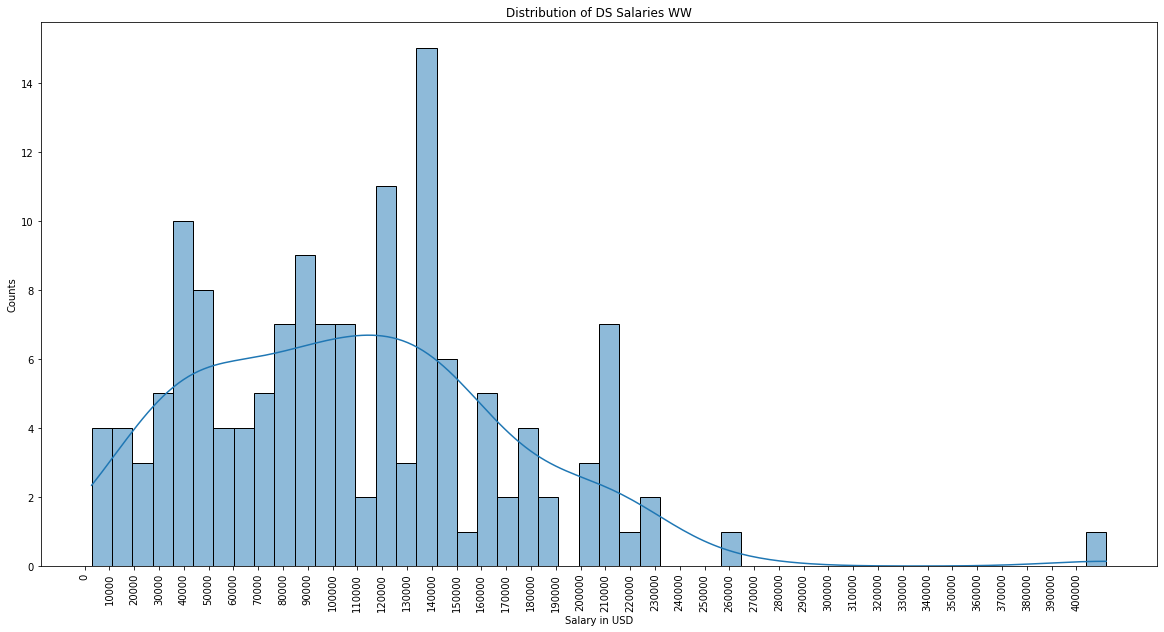

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=ds, x='salary_in_usd', kde=True, bins=50)
ax.set_title('Distribution of DS Salaries WW')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Counts')
ax.set_xticks(range(0, 400000 + 1, 10000))
plt.xticks(rotation=90)
plt.show()

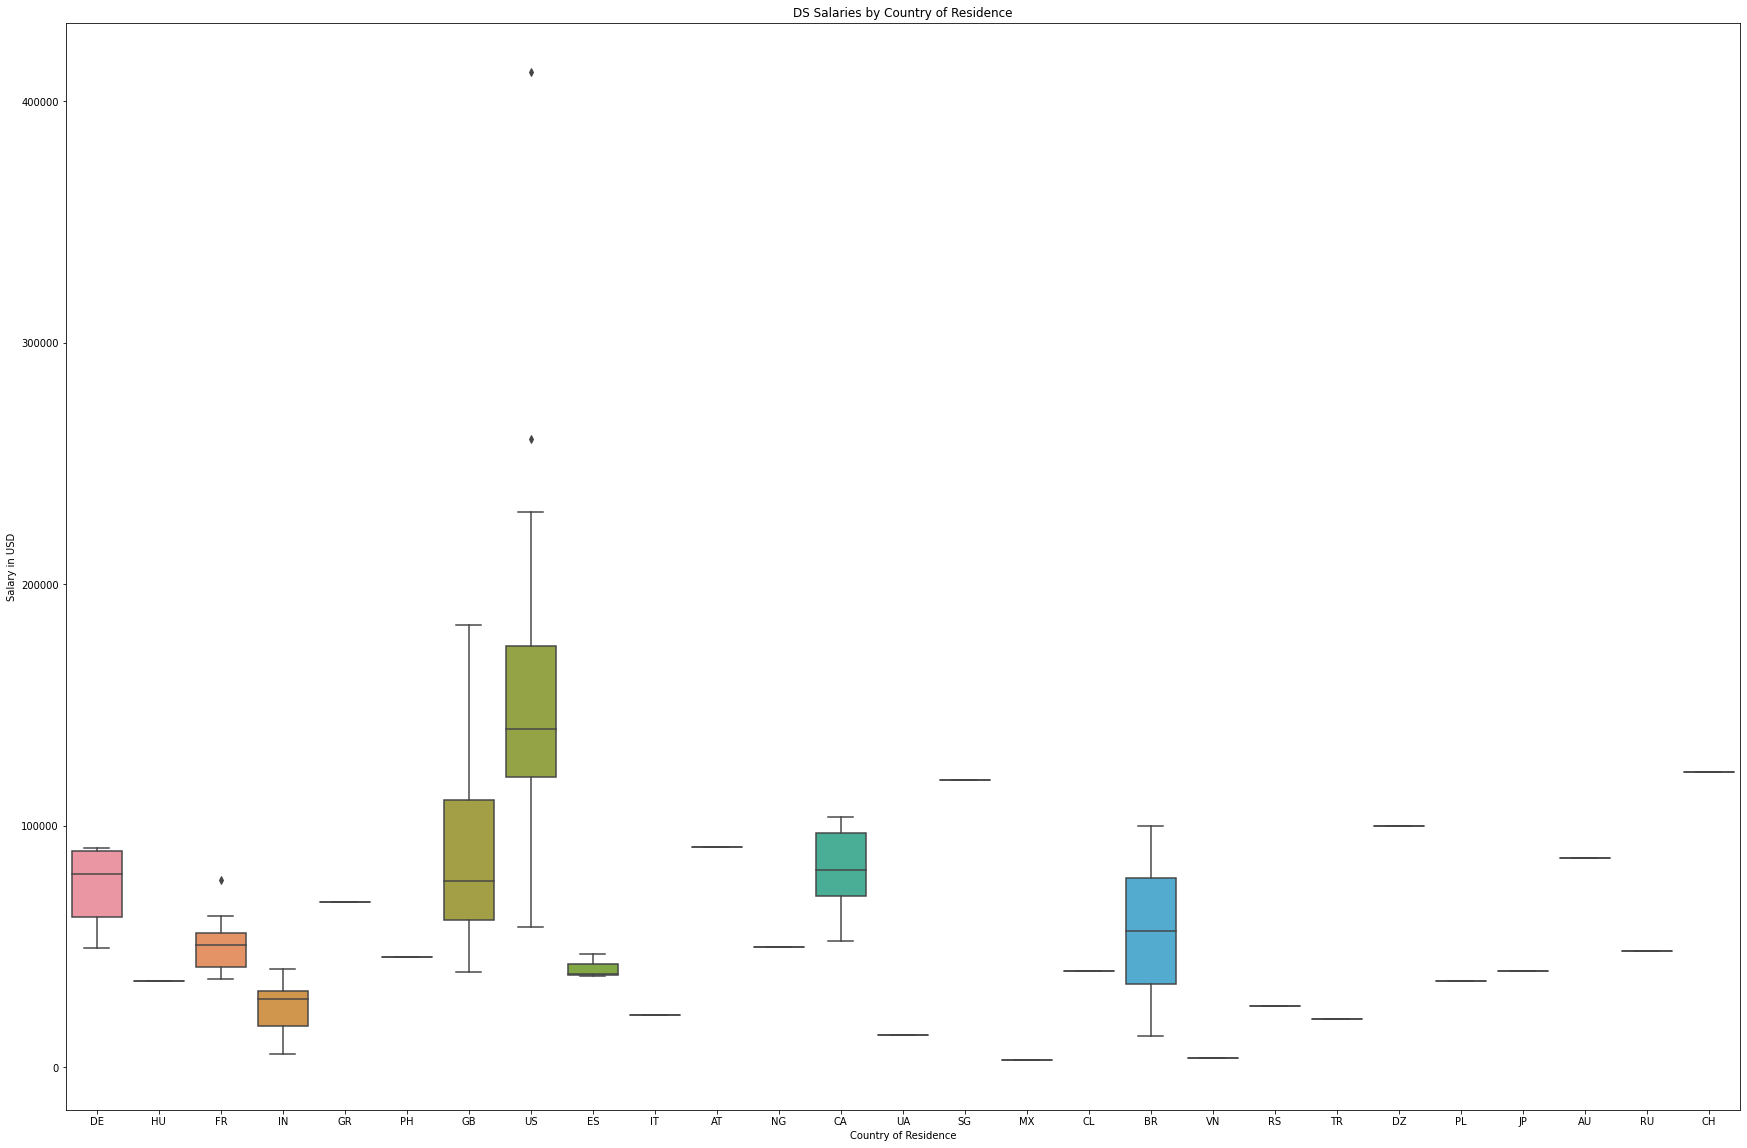

In [12]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=ds, x='employee_residence', y='salary_in_usd')
ax.set_title('DS Salaries by Country of Residence')
ax.set_xlabel('Country of Residence')
ax.set_ylabel('Salary in USD')
plt.show()

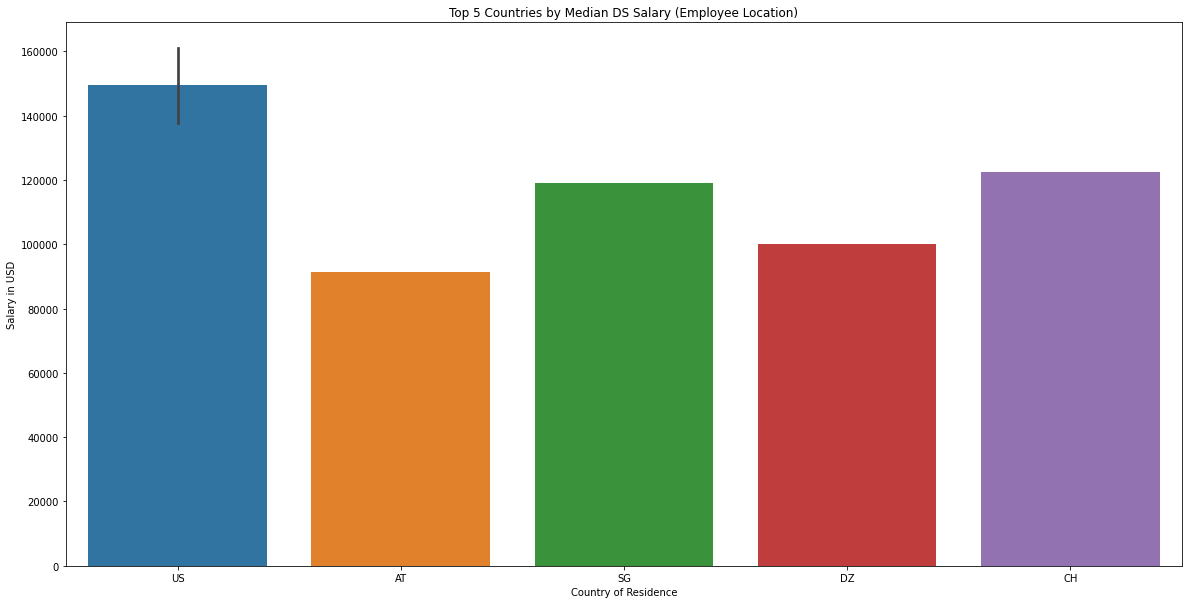

In [88]:
top_5_countries = ds.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False).head(5).index
employee = ds[ds['employee_residence'].isin(top_5_countries)]

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=employee, x='employee_residence', y='salary_in_usd')
ax.set_title('Top 5 Countries by Median DS Salary (Employee Location)')
ax.set_xlabel('Country of Residence')
ax.set_ylabel('Salary in USD')
plt.show()

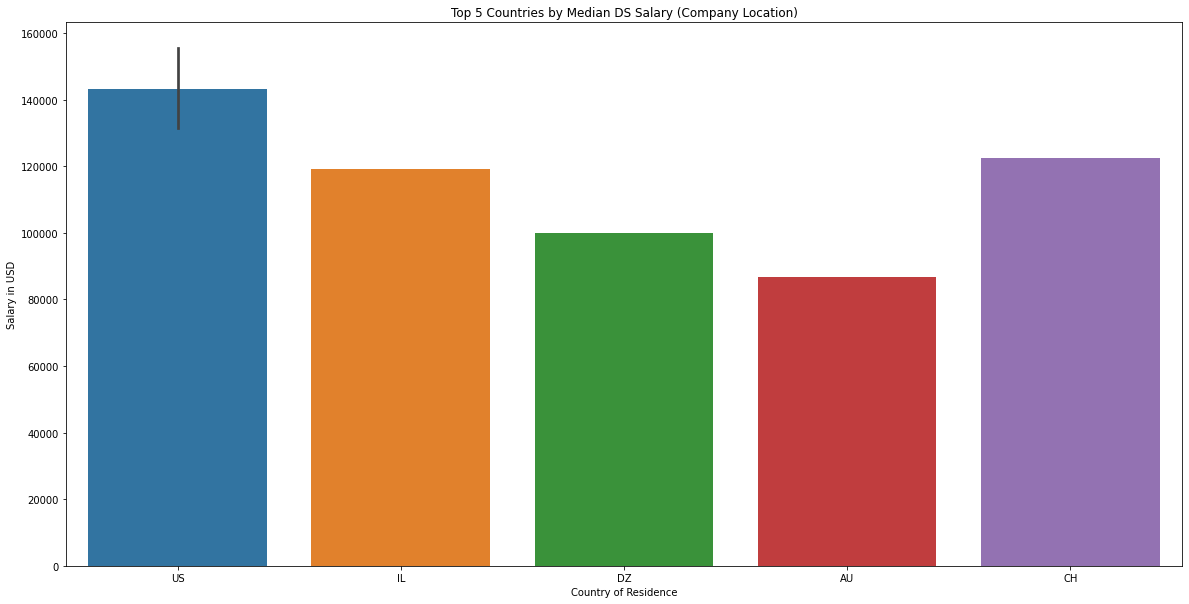

In [90]:
top_5_countries_comp = ds.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(5).index
company = ds[ds['company_location'].isin(top_5_countries_comp)]


fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=company, x='company_location', y='salary_in_usd')
ax.set_title('Top 5 Countries by Median DS Salary (Company Location)')
ax.set_xlabel('Country of Residence')
ax.set_ylabel('Salary in USD')
plt.show()

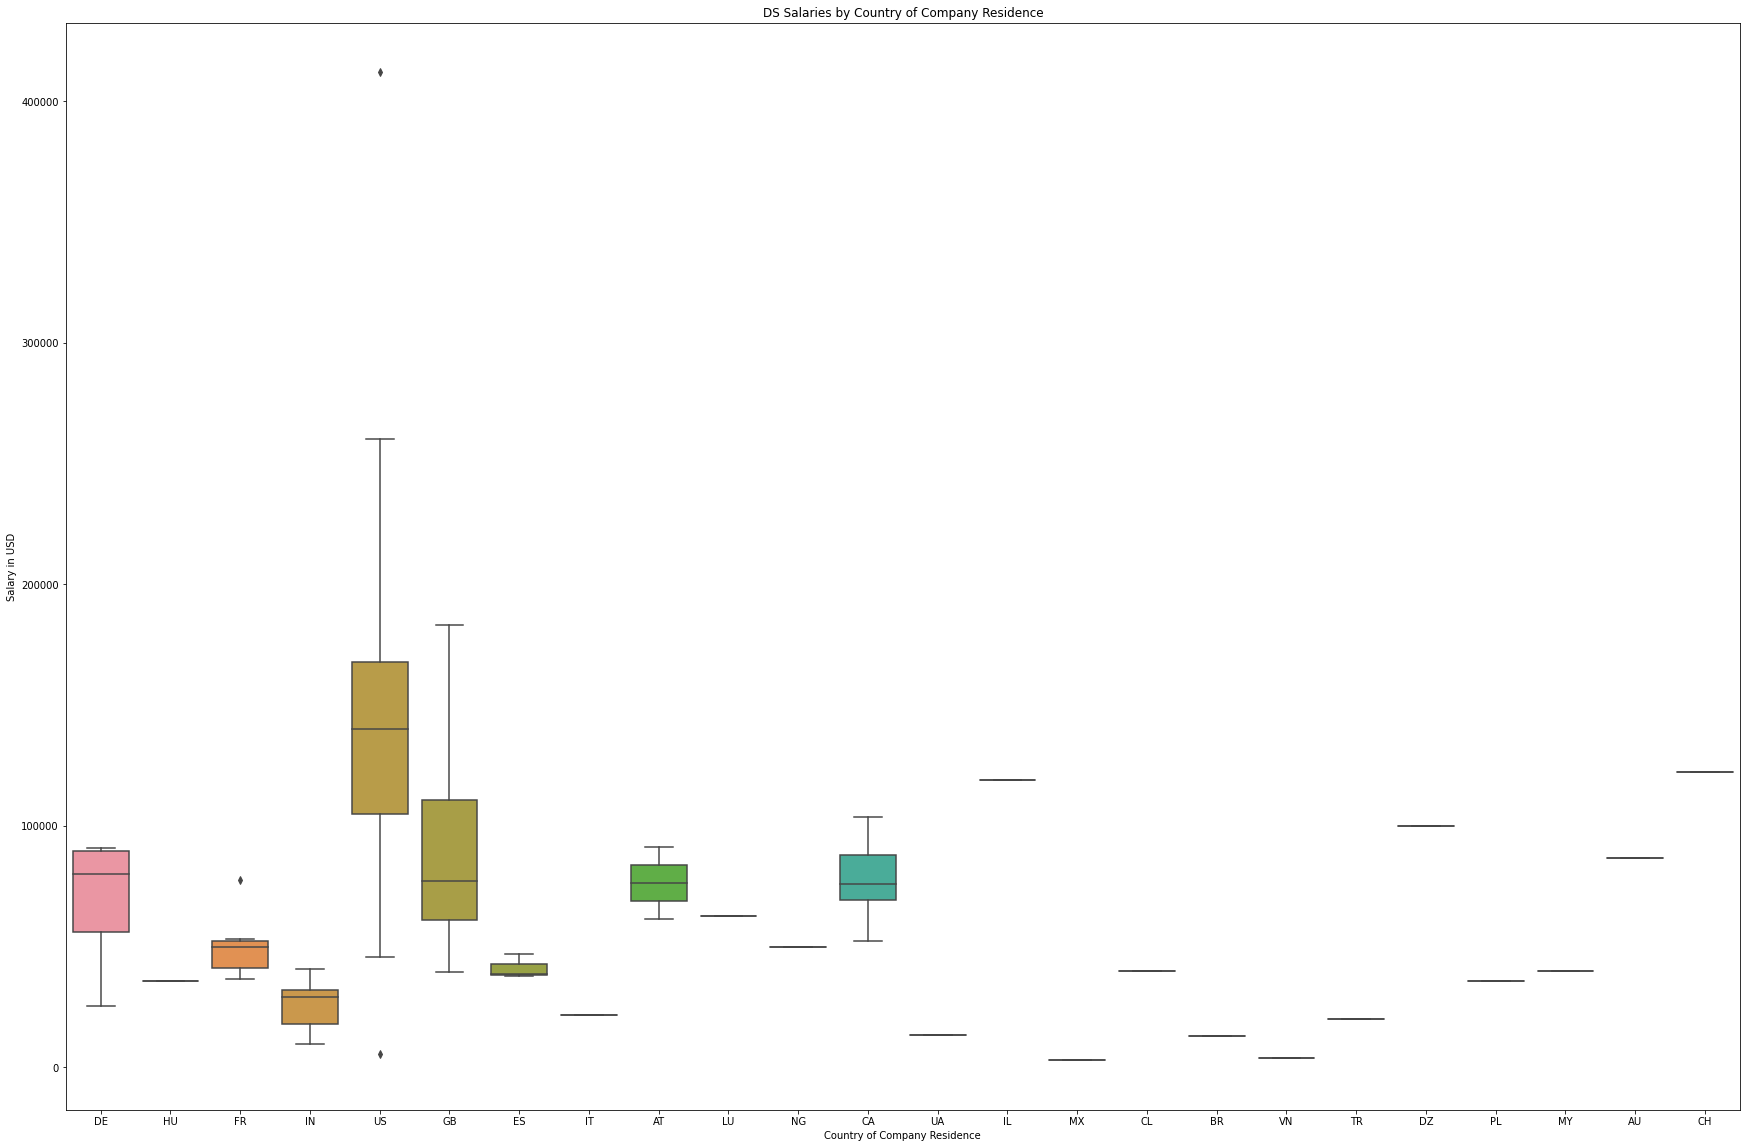

In [23]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=ds, x='company_location', y='salary_in_usd')
ax.set_title('DS Salaries by Country of Company Residence')
ax.set_xlabel('Country of Company Residence')
ax.set_ylabel('Salary in USD')
plt.show()

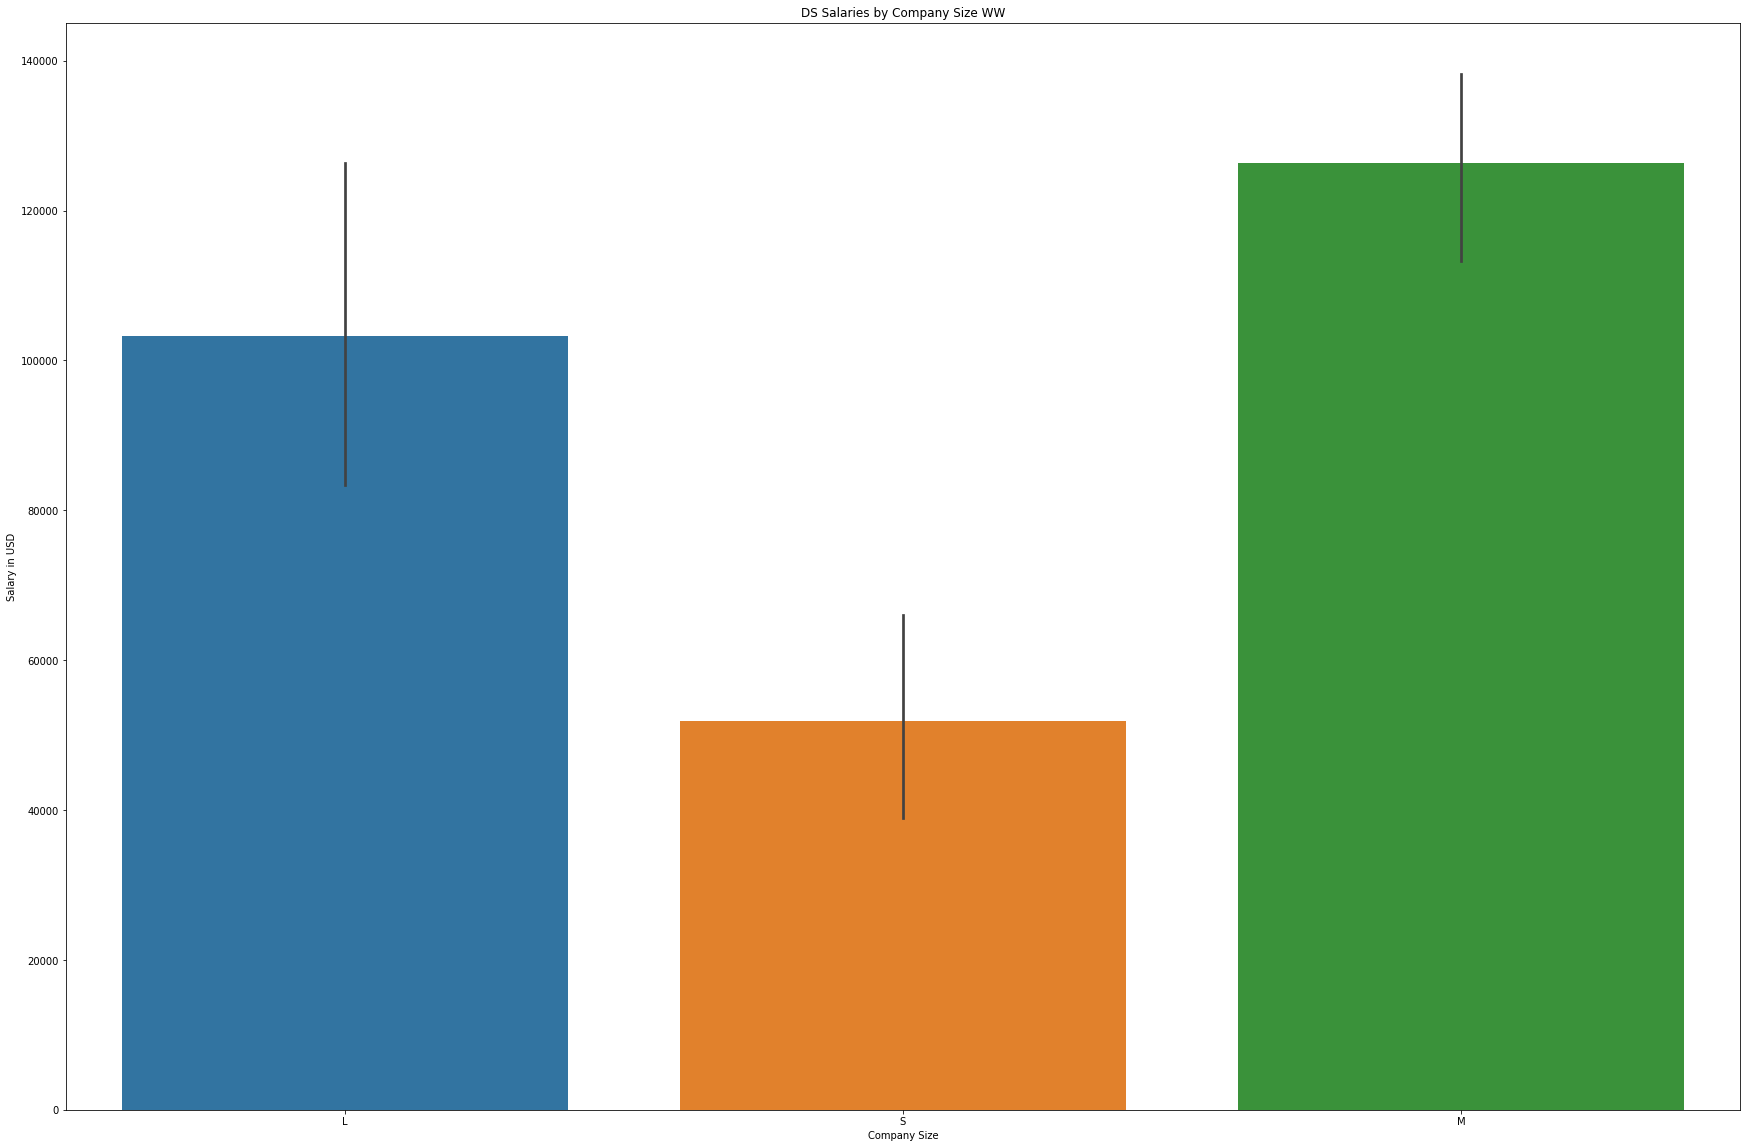

In [108]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.barplot(data=ds, x='company_size', y='salary_in_usd')
ax.set_title('DS Salaries by Company Size WW')
ax.set_xlabel('Company Size')
ax.set_ylabel('Salary in USD')
plt.show()

In [106]:
mean_salary_comp_siz = ds.groupby('company_size')['salary_in_usd'].mean()
mean_salary_comp_siz

company_size
L    103313.355556
M    126380.753247
S     51925.761905
Name: salary_in_usd, dtype: float64

In [114]:
us = ds[ds['employee_residence']=='US']
mean_salary_comp_siz = us.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean()
mean_salary_comp_siz

company_size  experience_level
L             EN                   58000.000000
              MI                  121750.000000
              SE                  183908.333333
M             EN                   90000.000000
              MI                  129812.500000
              SE                  161530.769231
S             EN                   98333.333333
              MI                   82500.000000
Name: salary_in_usd, dtype: float64

In [115]:
ca = ds[ds['employee_residence']=='CA']
mean_salary_comp_siz = ca.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean()
mean_salary_comp_siz

company_size  experience_level
L             EN                   52396.0
              MI                   75774.0
              SE                  103691.0
M             MI                   84668.0
S             SE                   87738.0
Name: salary_in_usd, dtype: float64

In [116]:
ind = ds[ds['employee_residence']=='IN']
mean_salary_comp_siz = ind.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean()
mean_salary_comp_siz

company_size  experience_level
L             EN                  29751.0
              MI                  36048.0
M             EN                  23420.5
              MI                  33808.0
S             MI                  10683.0
Name: salary_in_usd, dtype: float64

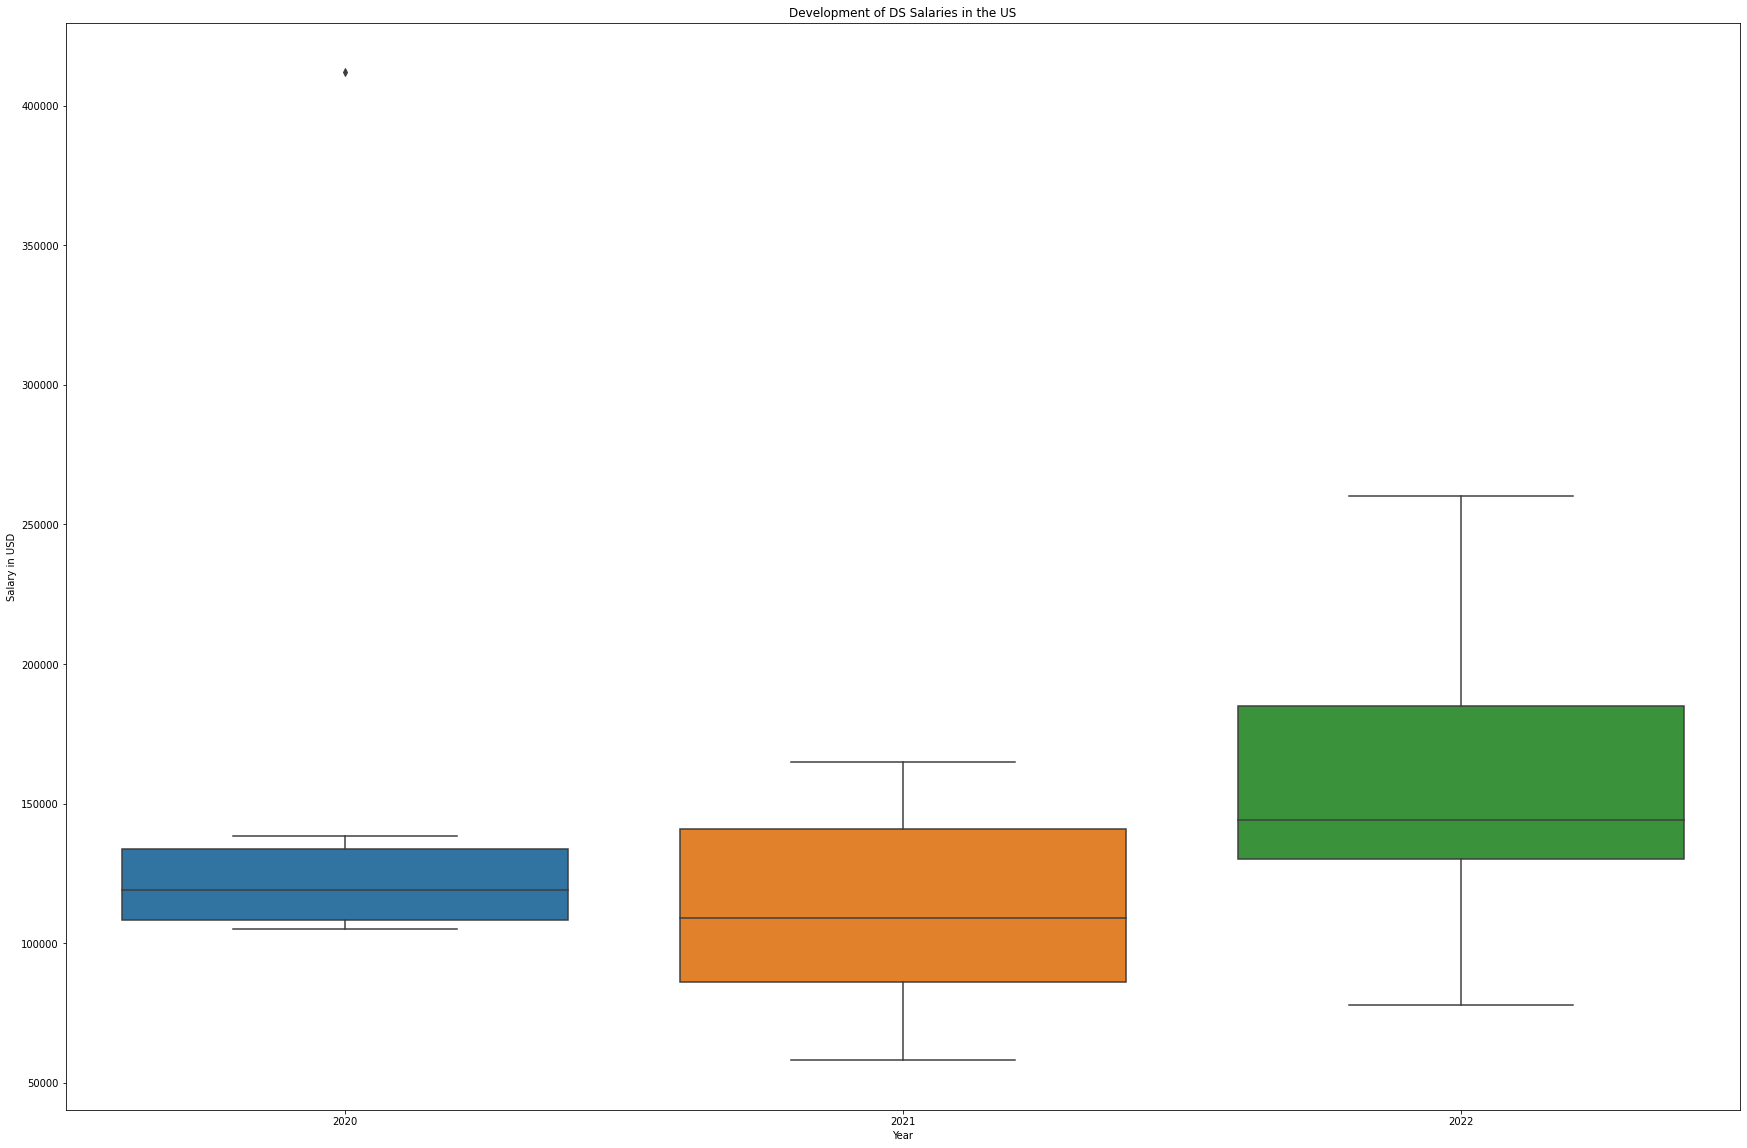

In [17]:
us_salaries = ds[ds['employee_residence'] == 'US']

fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x='work_year', y='salary_in_usd', data=us_salaries)
ax.set_title('Development of DS Salaries in the US')
ax.set_xlabel('Year')
ax.set_ylabel('Salary in USD')
plt.show()

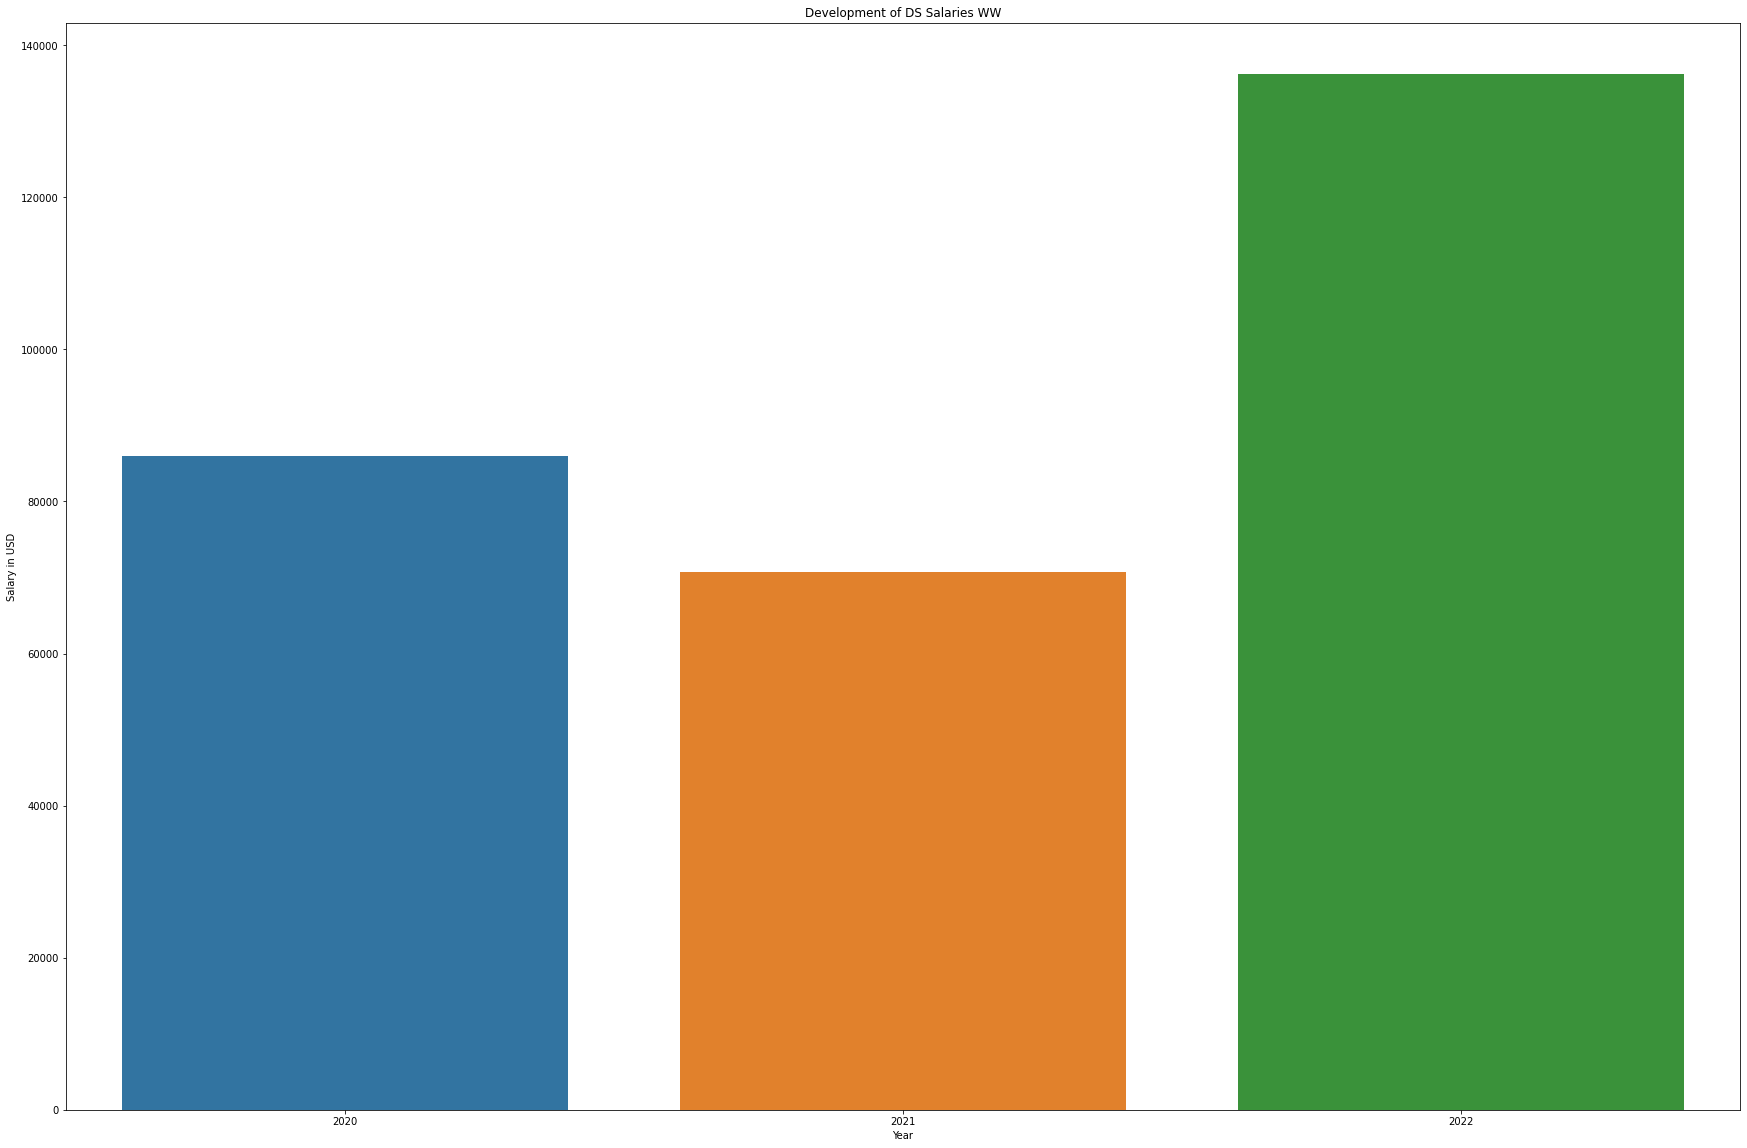

In [27]:
ww_salary = ds.groupby(['work_year'])['salary_in_usd'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 20))
sns.barplot(x='work_year', y='salary_in_usd', data=ww_salary)
ax.set_title('Development of DS Salaries WW')
ax.set_xlabel('Year')
ax.set_ylabel('Salary in USD')
plt.show()

In [104]:
mean_2020 = ds[ds['work_year'] == 2020]['salary_in_usd'].mean()
mean_2022 = ds[ds['work_year'] == 2022]['salary_in_usd'].mean()
diff = mean_2022 - mean_2020
diff

50201.567099567095

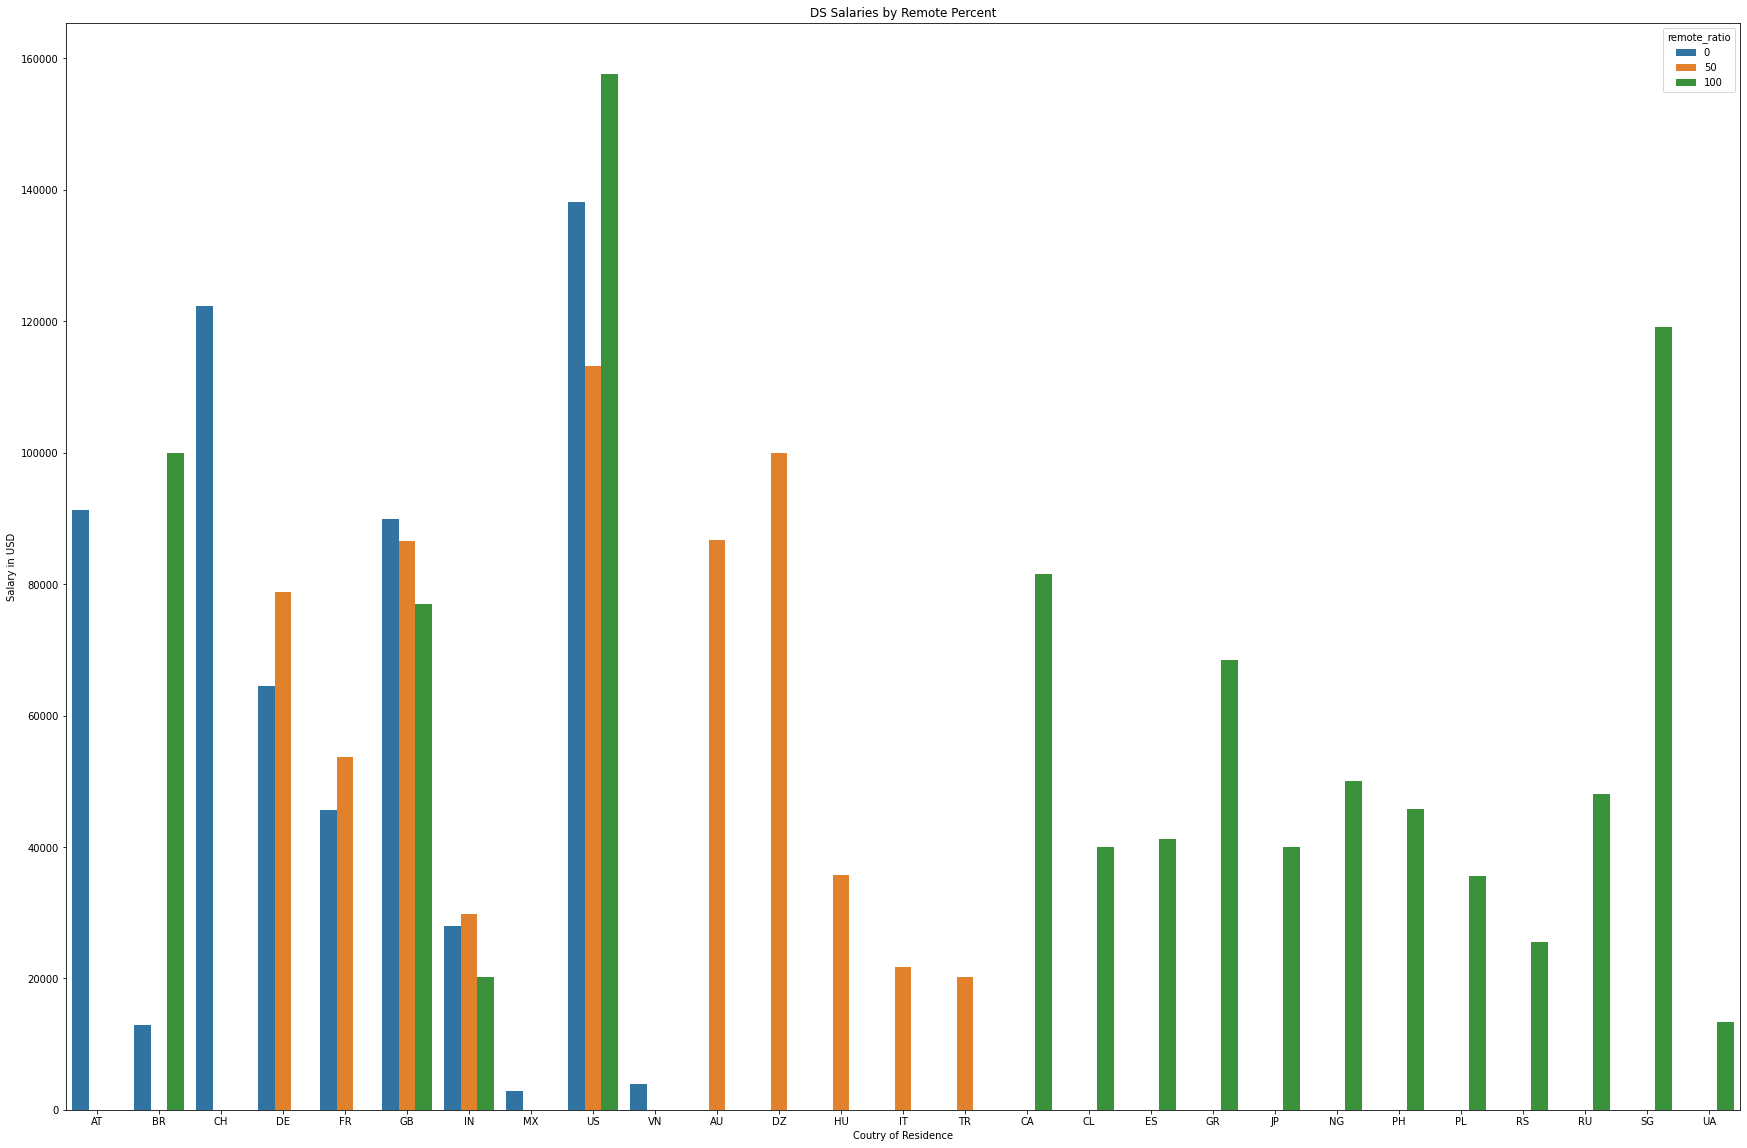

In [22]:
remote = ds.groupby(['remote_ratio', 'employee_residence'])['salary_in_usd'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 20))
sns.barplot(x='employee_residence', y='salary_in_usd', hue='remote_ratio', data=remote)
ax.set_title('DS Salaries by Remote Percent')
ax.set_xlabel('Coutry of Residence')
ax.set_ylabel('Salary in USD')
plt.show()

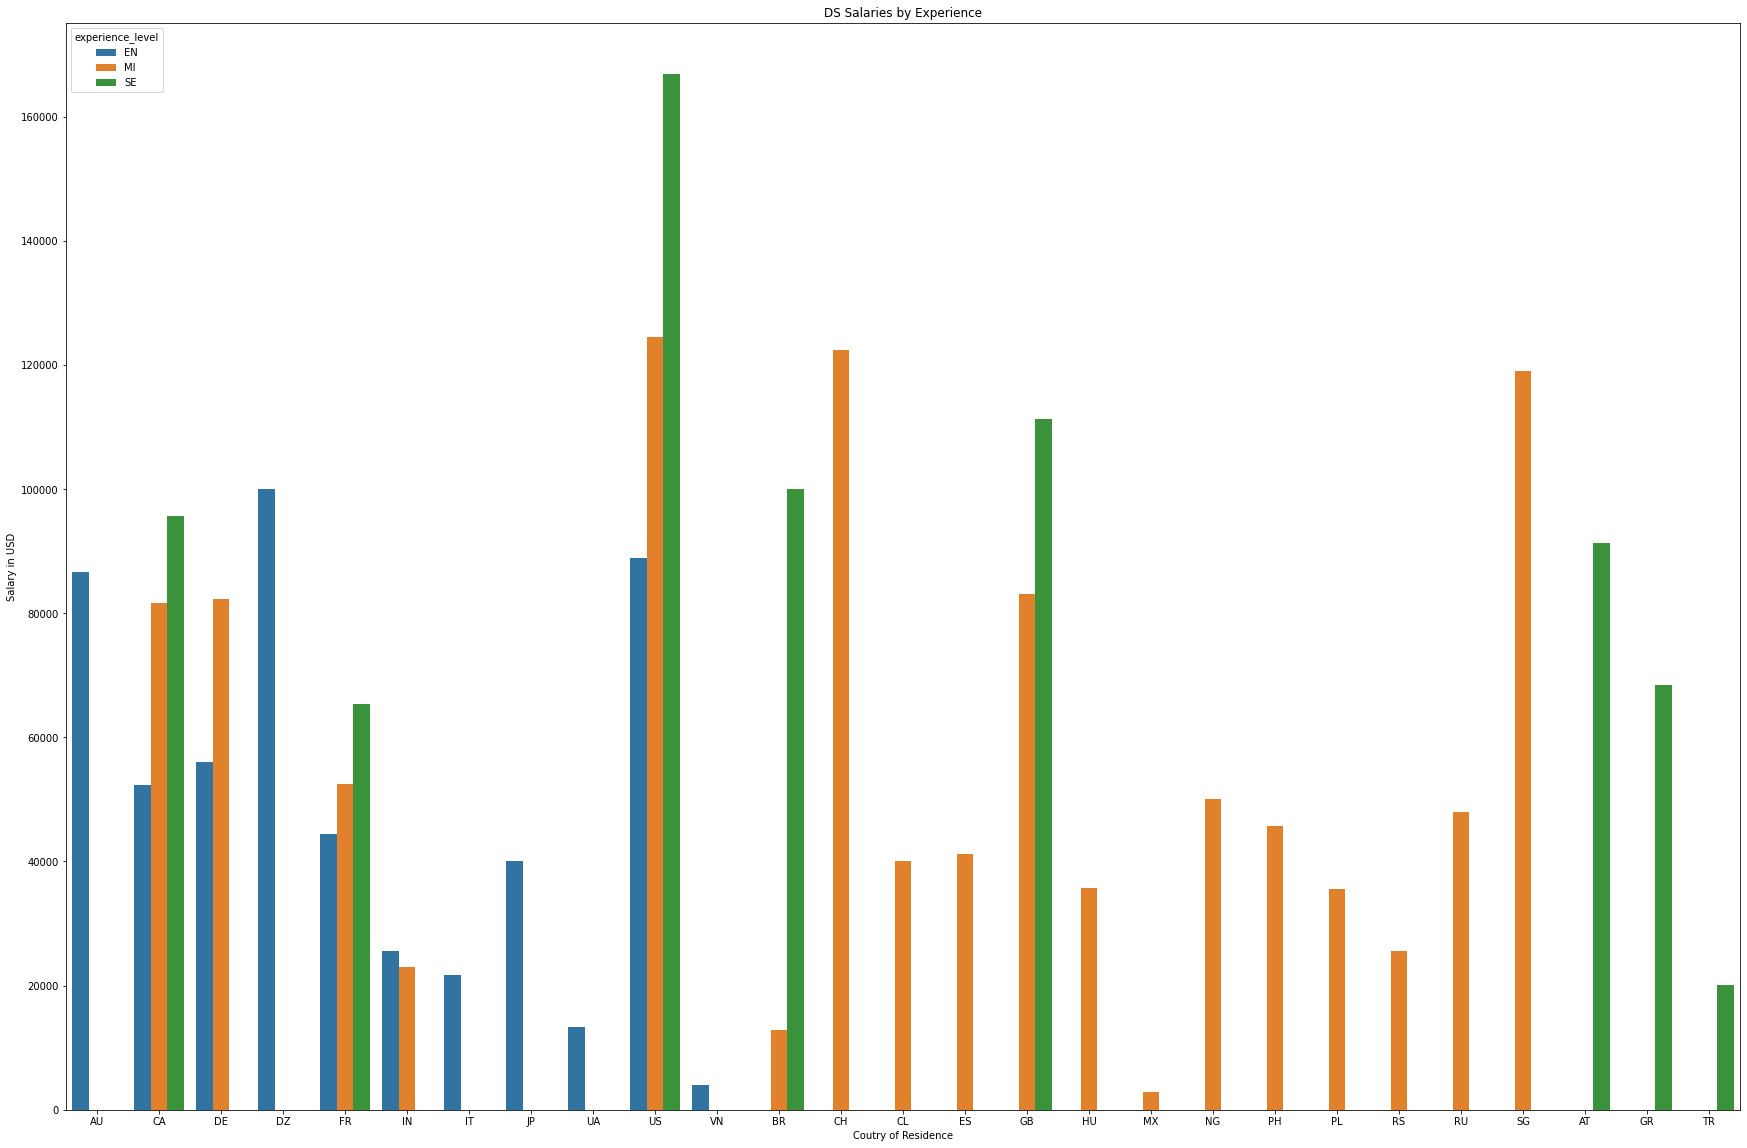

In [101]:
exp = ds.groupby(['experience_level', 'employee_residence'])['salary_in_usd'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 20))
sns.barplot(x='employee_residence', y='salary_in_usd', hue='experience_level', data=exp)
ax.set_title('DS Salaries by Experience')
ax.set_xlabel('Coutry of Residence')
ax.set_ylabel('Salary in USD')
plt.show()

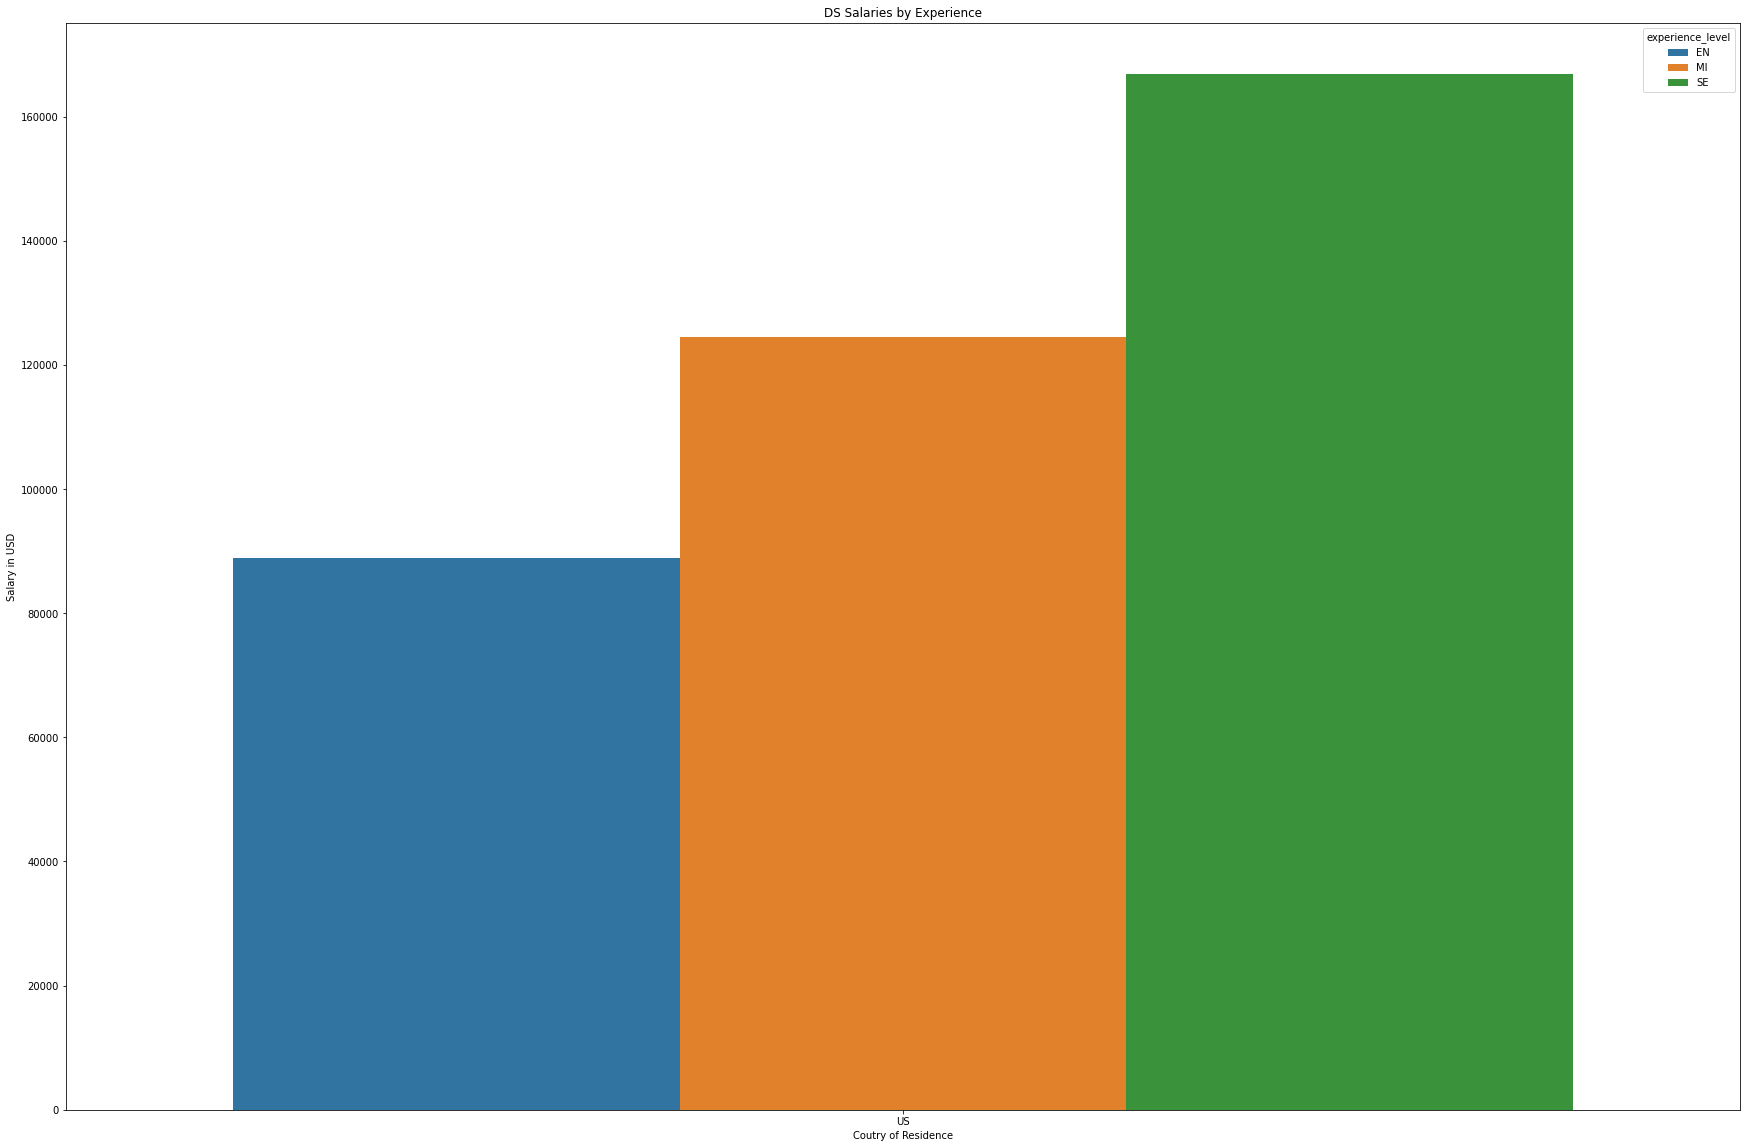

In [103]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.barplot(x='employee_residence', y='salary_in_usd', hue='experience_level', data=exp[exp['employee_residence']=='US'])
ax.set_title('DS Salaries by Experience')
ax.set_xlabel('Coutry of Residence')
ax.set_ylabel('Salary in USD')
plt.show()

In [43]:
avg_salaries = ds.groupby('employee_residence')['salary_in_usd'].mean()
highest_paid_country = avg_salaries.idxmax()
highest_paid_salary = avg_salaries.max()
lowest_paid_country = avg_salaries.idxmin()
lowest_paid_salary = avg_salaries.min()

In [47]:
print("Highest average paying country:",highest_paid_country,
      ", Salary:",highest_paid_salary)

Highest average paying country: US , Salary: 149408.33333333334


In [48]:
print("Lowest average paying country:",lowest_paid_country,
      ", Salary:",lowest_paid_salary)

Lowest average paying country: MX , Salary: 2859.0


In [74]:
salaries_overview = ds.groupby('employee_residence')['salary_in_usd'].agg(
    average_salary='mean',
    median_salary='median',
    max_salary='max',
    min_salary='min',
    employee_count='count' 
)

In [77]:
ds.salary_in_usd.max()

412000

In [75]:
salaries_overview = salaries_overview.sort_values(by='average_salary',ascending=False)
salaries_overview = salaries_overview.rename(columns={'employee_residence': 'Country of Employee Residence',
                                                     'average_salary': 'Average Salary (USD)',
                                                     'median_salary': 'Median Salary (USD)',
                                                     'employee_count': 'Number of Employees'})
salaries_overview

,Average Salary (USD),Median Salary (USD),max_salary,min_salary,Number of Employees
employee_residence,,,,,
US,149408.333333,140000.0,412000,58000,78
CH,122346.000000,122346.0,122346,122346,1
SG,119059.000000,119059.0,119059,119059,1
DZ,100000.000000,100000.0,100000,100000,1
AT,91237.000000,91237.0,91237,91237,1
GB,88177.363636,76958.0,183228,39263,11
AU,86703.000000,86703.0,86703,86703,1
CA,81489.166667,81756.0,103691,52396,6
DE,74773.714286,79833.0,90734,49268,7


In [81]:
salaries_overview_company = ds.groupby('company_location')['salary_in_usd'].agg(
    average_salary='mean',
    median_salary='median',
    max_salary='max',
    min_salary='min',
    employee_count='count' 
)

In [83]:
salaries_overview_company = salaries_overview_company.sort_values(by='average_salary',ascending=False)
salaries_overview_company = salaries_overview_company.rename(columns={'company_location': 'Company Location',
                                                     'average_salary': 'Average Salary (USD)',
                                                     'median_salary': 'Median Salary (USD)',
                                                     'employee_count': 'Number of Employees',
                                                    'min': 'Min Salary',
                                                    'max': 'Max Salary'})
salaries_overview_company

,Average Salary (USD),Median Salary (USD),max_salary,min_salary,Number of Employees
company_location,,,,,
US,143115.678571,140000.0,412000,5679,84
CH,122346.000000,122346.0,122346,122346,1
IL,119059.000000,119059.0,119059,119059,1
DZ,100000.000000,100000.0,100000,100000,1
GB,88177.363636,76958.0,183228,39263,11
AU,86703.000000,86703.0,86703,86703,1
CA,77787.000000,75774.0,103691,52396,5
AT,76352.000000,76352.0,91237,61467,2
DE,69640.142857,79833.0,90734,25532,7
